In [1]:
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_correlation_matrix(df, fig_ax=None, absolute=True):
    if fig_ax:
        fig, ax = fig_ax
    else:
        fig, ax = plt.subplots()
        
    corrcoefs = np.corrcoef(df.astype(float).to_numpy().T)
    if absolute:
        corrcoefs = abs(corrcoefs)
        
    mask = np.logical_not(np.tri(corrcoefs.shape[0], k=0))
    corrcoefs = np.ma.array(corrcoefs, mask=mask)
    
    im = ax.imshow(corrcoefs, origin="lower", aspect=0.3, vmin=0 if absolute else -1, vmax=1)
    fig.colorbar(im, ax=ax, label='Interactive Colorbar')

    keys = df.columns.tolist()
    ticks = np.arange(len(keys))
    
    ax.xaxis.tick_top()
    
    ax.set_xticks(ticks, keys, rotation=-45, ha='right')
    ax.set_yticks(ticks, keys)    
    
    ax.set_xticks(ticks-0.5, minor=True)
    ax.set_yticks(ticks-0.5, minor=True)
    
    ax.set_aspect(0.7)
        
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    
    return fig, ax

In [3]:
tracksummary_gsf = uproot.open("../output_odd/root/tracksummary_gsf.root:tracksummary") \
    .arrays(library="pd") \
    .reset_index() \
    .drop(["entry", "subentry", "subTraj_nr", "measurementChi2", "outlierChi2", "measurementVolume", "outlierVolume", "measurementLayer", "outlierLayer"], axis=1)
tracksummary_gsf.head(3)

,event_nr,multiTraj_nr,nStates,nMeasurements,nOutliers,nHoles,nSharedHits,chi2Sum,NDF,nMajorityHits,...,res_ePHI_fit,res_eTHETA_fit,res_eQOP_fit,res_eT_fit,pull_eLOC0_fit,pull_eLOC1_fit,pull_ePHI_fit,pull_eTHETA_fit,pull_eQOP_fit,pull_eT_fit
0,0,0,29,16,0,0,0,40.263508,28,16,...,0.000129,0.000112,0.002796,-19.809113,-0.811860,-0.147961,0.317972,0.292647,1.655375,-0.006608
1,0,1,26,13,0,0,0,70.768822,22,13,...,-0.001766,-0.000100,-0.030004,-276.226013,2.738435,0.136334,-2.935761,-0.195030,-12.858435,-0.092139
2,0,2,29,12,0,1,0,796.918762,24,12,...,-0.005530,0.000217,-0.037441,593.617249,0.664661,0.341485,-0.896498,0.283059,-1.929695,0.198009


In [4]:
tracksummary_gsf.shape

(982, 51)

In [5]:
print(list(tracksummary_gsf.columns))

['event_nr', 'multiTraj_nr', 'nStates', 'nMeasurements', 'nOutliers', 'nHoles', 'nSharedHits', 'chi2Sum', 'NDF', 'nMajorityHits', 'majorityParticleId', 't_charge', 't_time', 't_vx', 't_vy', 't_vz', 't_px', 't_py', 't_pz', 't_theta', 't_phi', 't_eta', 't_p', 't_pT', 't_d0', 't_z0', 'hasFittedParams', 'eLOC0_fit', 'eLOC1_fit', 'ePHI_fit', 'eTHETA_fit', 'eQOP_fit', 'eT_fit', 'err_eLOC0_fit', 'err_eLOC1_fit', 'err_ePHI_fit', 'err_eTHETA_fit', 'err_eQOP_fit', 'err_eT_fit', 'res_eLOC0_fit', 'res_eLOC1_fit', 'res_ePHI_fit', 'res_eTHETA_fit', 'res_eQOP_fit', 'res_eT_fit', 'pull_eLOC0_fit', 'pull_eLOC1_fit', 'pull_ePHI_fit', 'pull_eTHETA_fit', 'pull_eQOP_fit', 'pull_eT_fit']


In [6]:
trackstates_gsf = uproot.open("../output_odd/root/trackstates_gsf.root:trackstates") \
    .arrays(library="pd") \
    .reset_index() \
    .drop(["entry", "subTraj_nr"], axis=1) \
    .rename({'subentry': 'state'}, axis=1)
trackstates_gsf.head(3)

,state,event_nr,multiTraj_nr,t_x,t_y,t_z,t_r,t_dx,t_dy,t_dz,...,pull_eT_smt,g_x_smt,g_y_smt,g_z_smt,px_smt,py_smt,pz_smt,eta_smt,pT_smt,chi2
0,0,0,0,-705.411316,737.028015,238.543320,1020.203613,-0.723745,0.646735,0.240680,...,-0.006309,-705.403320,737.033936,239.599289,-2.760612,2.465392,0.923216,0.246918,3.701235,1.143364
1,1,0,0,-700.378723,732.526245,236.868973,1013.471802,-0.723073,0.647486,0.240680,...,-0.006316,-700.361389,732.539062,237.885681,-2.757135,2.467957,0.922822,0.246872,3.700351,0.672478
2,2,0,0,-561.722778,604.734558,190.103867,825.370422,-0.704112,0.668046,0.240709,...,-0.006377,-561.706299,604.745422,190.859116,-2.833277,2.688211,0.974021,0.246874,3.905629,0.031630


In [7]:
print(list(trackstates_gsf.columns))

['state', 'event_nr', 'multiTraj_nr', 't_x', 't_y', 't_z', 't_r', 't_dx', 't_dy', 't_dz', 't_eLOC0', 't_eLOC1', 't_ePHI', 't_eTHETA', 't_eQOP', 't_eT', 'nStates', 'nMeasurements', 'volume_id', 'layer_id', 'module_id', 'pathLength', 'l_x_hit', 'l_y_hit', 'g_x_hit', 'g_y_hit', 'g_z_hit', 'res_x_hit', 'res_y_hit', 'err_x_hit', 'err_y_hit', 'pull_x_hit', 'pull_y_hit', 'dim_hit', 'nPredicted', 'predicted', 'eLOC0_prt', 'eLOC1_prt', 'ePHI_prt', 'eTHETA_prt', 'eQOP_prt', 'eT_prt', 'res_eLOC0_prt', 'res_eLOC1_prt', 'res_ePHI_prt', 'res_eTHETA_prt', 'res_eQOP_prt', 'res_eT_prt', 'err_eLOC0_prt', 'err_eLOC1_prt', 'err_ePHI_prt', 'err_eTHETA_prt', 'err_eQOP_prt', 'err_eT_prt', 'pull_eLOC0_prt', 'pull_eLOC1_prt', 'pull_ePHI_prt', 'pull_eTHETA_prt', 'pull_eQOP_prt', 'pull_eT_prt', 'g_x_prt', 'g_y_prt', 'g_z_prt', 'px_prt', 'py_prt', 'pz_prt', 'eta_prt', 'pT_prt', 'nFiltered', 'filtered', 'eLOC0_flt', 'eLOC1_flt', 'ePHI_flt', 'eTHETA_flt', 'eQOP_flt', 'eT_flt', 'res_eLOC0_flt', 'res_eLOC1_flt', 'res

In [8]:
def total_energy_loss(df):
    p = 1/abs(df["t_eQOP"].to_numpy())
    return p[0] - p[-1]

tracksummary_gsf["total_energy_loss"] = trackstates_gsf.groupby(["event_nr", "multiTraj_nr"]).apply(total_energy_loss).to_numpy()
tracksummary_gsf["res_eP_fit"] = 1./abs(tracksummary_gsf["eQOP_fit"]) - tracksummary_gsf["t_p"]

(<Figure size 432x288 with 2 Axes>, <AxesSubplot: >)

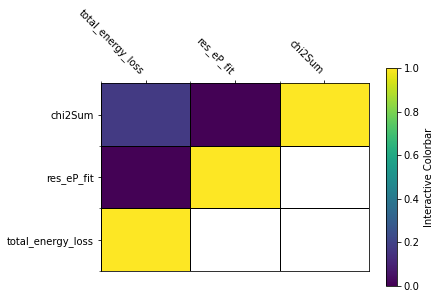

In [9]:
plot_correlation_matrix(tracksummary_gsf[["total_energy_loss", "res_eP_fit", "chi2Sum"]])

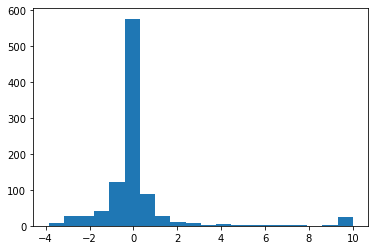

In [10]:
_ = plt.hist(np.clip(tracksummary_gsf["res_eP_fit"], -10, 10), bins="rice")

/home/benjamin/.local/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/benjamin/.local/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


(<Figure size 1152x720 with 2 Axes>, <AxesSubplot: >)

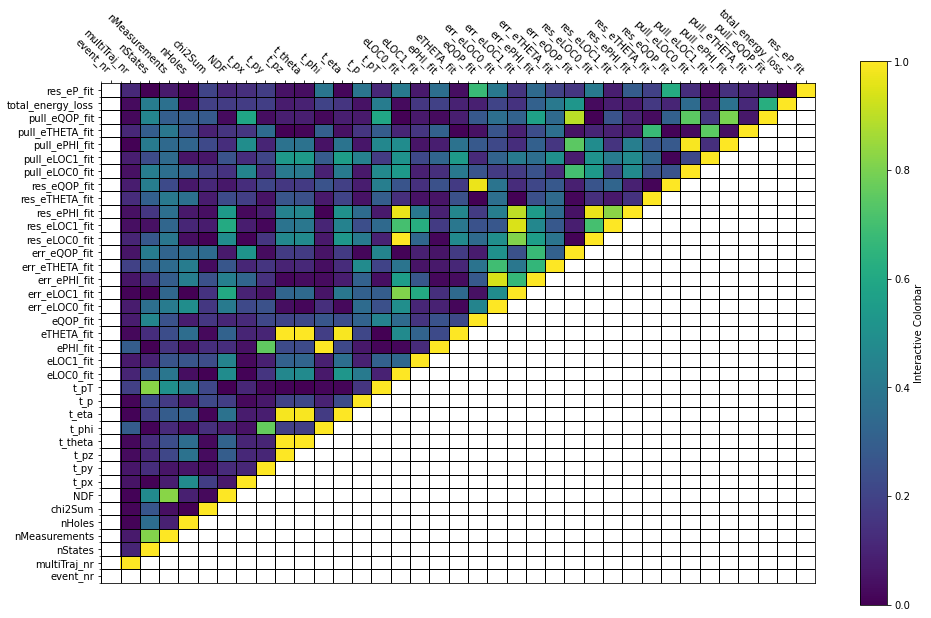

In [11]:
high_res = tracksummary_gsf[ tracksummary_gsf["res_eP_fit"] > 10 ].filter(regex="^(?!.*T_fit).*$", axis=1).filter(regex="^(?!.*t_v).*$", axis=1)
high_res = high_res.drop(["hasFittedParams", "t_time", "t_charge", "t_z0", "t_d0", "nSharedHits", "nOutliers", "majorityParticleId", "nMajorityHits"], axis=1)
plot_correlation_matrix(high_res, plt.subplots(figsize=(16,10)))

<BarContainer object of 3 artists>

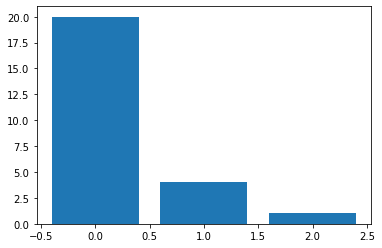

In [12]:
plt.bar(*np.unique(high_res["nHoles"], return_counts=True))